In [35]:
options(warn = -1)

In [1]:
library(rgdal)
library(readxl)
library(dplyr)
library(tools)
library(lubridate)
library(stringr)

Warning message:
"package 'rgdal' was built under R version 4.0.5"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.0.5"
rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj

Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following object

In [72]:
source("functions.R")

In [3]:
path <- "T:/Data/LTD Data/BikeOnBuses/Monthly/"

In [28]:
excel_sheets(paste0(path,"LTD Bike Count_2013.xlsx"))

[1] "bike count_Jan13"  "bike count_Feb13"  "bike count_Mar13" 
 [4] "bike count_May13"  "bike count_Jun13"  "bike count_Jul13" 
 [7] "bike count_Aug13"  "bike count_Sept13" "bike count_Nov13" 
[10] "bike count_Dec13"

In [33]:
files <- file_path_sans_ext(list.files(path))

In [123]:
for(file in files){
    if(file == "LTD Bike Count_2013"){
        data <- readExcel(paste0(file, ".xlsx"))
    }else{
        ndata <- readExcel(paste0(file, ".xlsx"))
        data <- rbind(data, ndata)
    }
    print(file)
}

[1] "LTD Bike Count_2013"
[1] "LTD Bike Count_2014"
[1] "LTD Bike Count_2015"
[1] "LTD Bike Count_2016"
[1] "LTD Bike Count_2017"
[1] "LTD Bike Count_2018"
[1] "LTD Bike Count_2019"
[1] "LTD Bike Count_2020"
[1] "LTD Bike Count_2021"


In [76]:
tail(data)

srv,date,block,trip_end,time,route,dir,stop,stop_name,latitude,longitude,bus,odometer,desc,qty,MonthYear,DailyRtQty,DailyQty
<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
sat,2021-11-13,7908,1899-12-31 08:47:00,1899-12-31 08:28:00,103,I,9938,Charnelton Station Inbound,44.05253,-123.0958,9105,13.44,bike on rack,1,November 2021,32,87
sat,2021-11-13,7908,1899-12-31 11:04:00,1899-12-31 10:37:00,103,I,2121,"Eugene Station, Bay U",44.04777,-123.0933,9105,37.45,bike on rack,1,November 2021,32,87
sat,2021-11-13,7908,1899-12-31 11:04:00,1899-12-31 10:46:00,103,I,9939,Monroe/6th Station Inbound,44.05320,-123.1054,9105,38.42,bike on rack,2,November 2021,32,87
sat,2021-11-13,7908,1899-12-31 12:14:00,1899-12-31 11:29:00,103,O,9951,Oak Patch Station Outbound,44.04782,-123.1356,9105,43.97,bike on rack,1,November 2021,32,87
sat,2021-11-13,7908,1899-12-31 12:14:00,1899-12-31 11:35:00,103,O,9944,Chambers/7th Station Outbound,44.05212,-123.1187,9105,45.09,bike on rack,1,November 2021,32,87
sat,2021-11-13,7908,1899-12-31 23:27:00,1899-12-31 22:39:00,103,O,9957,Sam Reynolds Station Outbound,44.04794,-123.1561,9105,165.46,bike on rack,1,November 2021,32,87


In [125]:
data <- data[year(data$date) != 2021 & data$dir == 'O',]

In [78]:
head(data)

srv,date,block,trip_end,time,route,dir,stop,stop_name,latitude,longitude,bus,odometer,desc,qty,MonthYear,DailyRtQty,DailyQty
<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
wkd,2013-01-02,1,1899-12-31 06:00:00,1899-12-31 05:23:00,91,O,9249,S/S of Hwy 126 (MP 23.41) E of Mt View Lane,44.13080,-122.6172,151,29.47,bike on rack,1,January 2013,3,549
wkd,2013-01-02,1,1899-12-31 09:25:00,1899-12-31 09:01:00,40,I,816,S/S of Royal W of Ruskin,44.06990,-123.1671,151,8.20,bike on rack,1,January 2013,31,549
wkd,2013-01-02,1,1899-12-31 10:25:00,1899-12-31 10:11:00,36,I,404,S/S of 18th W of McKinley,44.04052,-123.1305,151,23.13,bike on rack,1,January 2013,20,549
wkd,2013-01-02,2,1899-12-31 05:21:00,1899-12-31 05:21:00,11,O,17,N/S of Main E of 62nd Pl,44.04573,-122.9181,1114,9.15,bike on rack,2,January 2013,93,549
wkd,2013-01-02,2,1899-12-31 05:37:00,1899-12-31 05:26:00,11,I,26,N/S of Main E of 50th,44.04582,-122.9434,1114,10.62,bike on rack,1,January 2013,93,549
wkd,2013-01-02,2,1899-12-31 06:37:00,1899-12-31 06:20:00,11,I,26,N/S of Main E of 50th,44.04581,-122.9433,1114,23.75,bike on rack,1,January 2013,93,549


In [79]:
names(data)

[1] "srv"        "date"       "block"      "trip_end"   "time"      
 [6] "route"      "dir"        "stop"       "stop_name"  "latitude"  
[11] "longitude"  "bus"        "odometer"   "desc"       "qty"       
[16] "MonthYear"  "DailyRtQty" "DailyQty"

In [44]:
range(data$date)

[1] "2013-01-02 UTC" "2020-12-31 UTC"

In [8]:
MPOBound <- readOGR(dsn = "V:/Data/Transportation", layer="MPO_Bound")

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded ellps WGS 84 in Proj4 definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded datum WGS_1984 in Proj4 definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"
Warning message in showSRID(wkt2, "PROJ"):
"Discarded ellps WGS 84 in Proj4 definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs"
Warning message in showSRID(wkt2, "PROJ"):
"Discarded datum World Geodetic System 1984 in Proj4 definition"


OGR data source with driver: ESRI Shapefile 
Source: "V:\Data\Transportation", layer: "MPO_Bound"
with 1 features
It has 3 fields


In [46]:
dim(data)

[1] 849020     15

In [47]:
length(unique(data$route))

[1] 40

In [126]:
aggdata <- aggregate(x=list(qty = data$qty), by=list(stop_name = data$stop_name), FUN=sum)

In [127]:
locdata <- aggregate(x=list(latitude = data$latitude, longitude= data$longitude), 
                     by=list(stop_name = data$stop_name), FUN=first)

In [128]:
aggdata <- merge(aggdata, locdata, by='stop_name')

In [129]:
spdf <- df2spdf(aggdata, 'longitude', 'latitude')

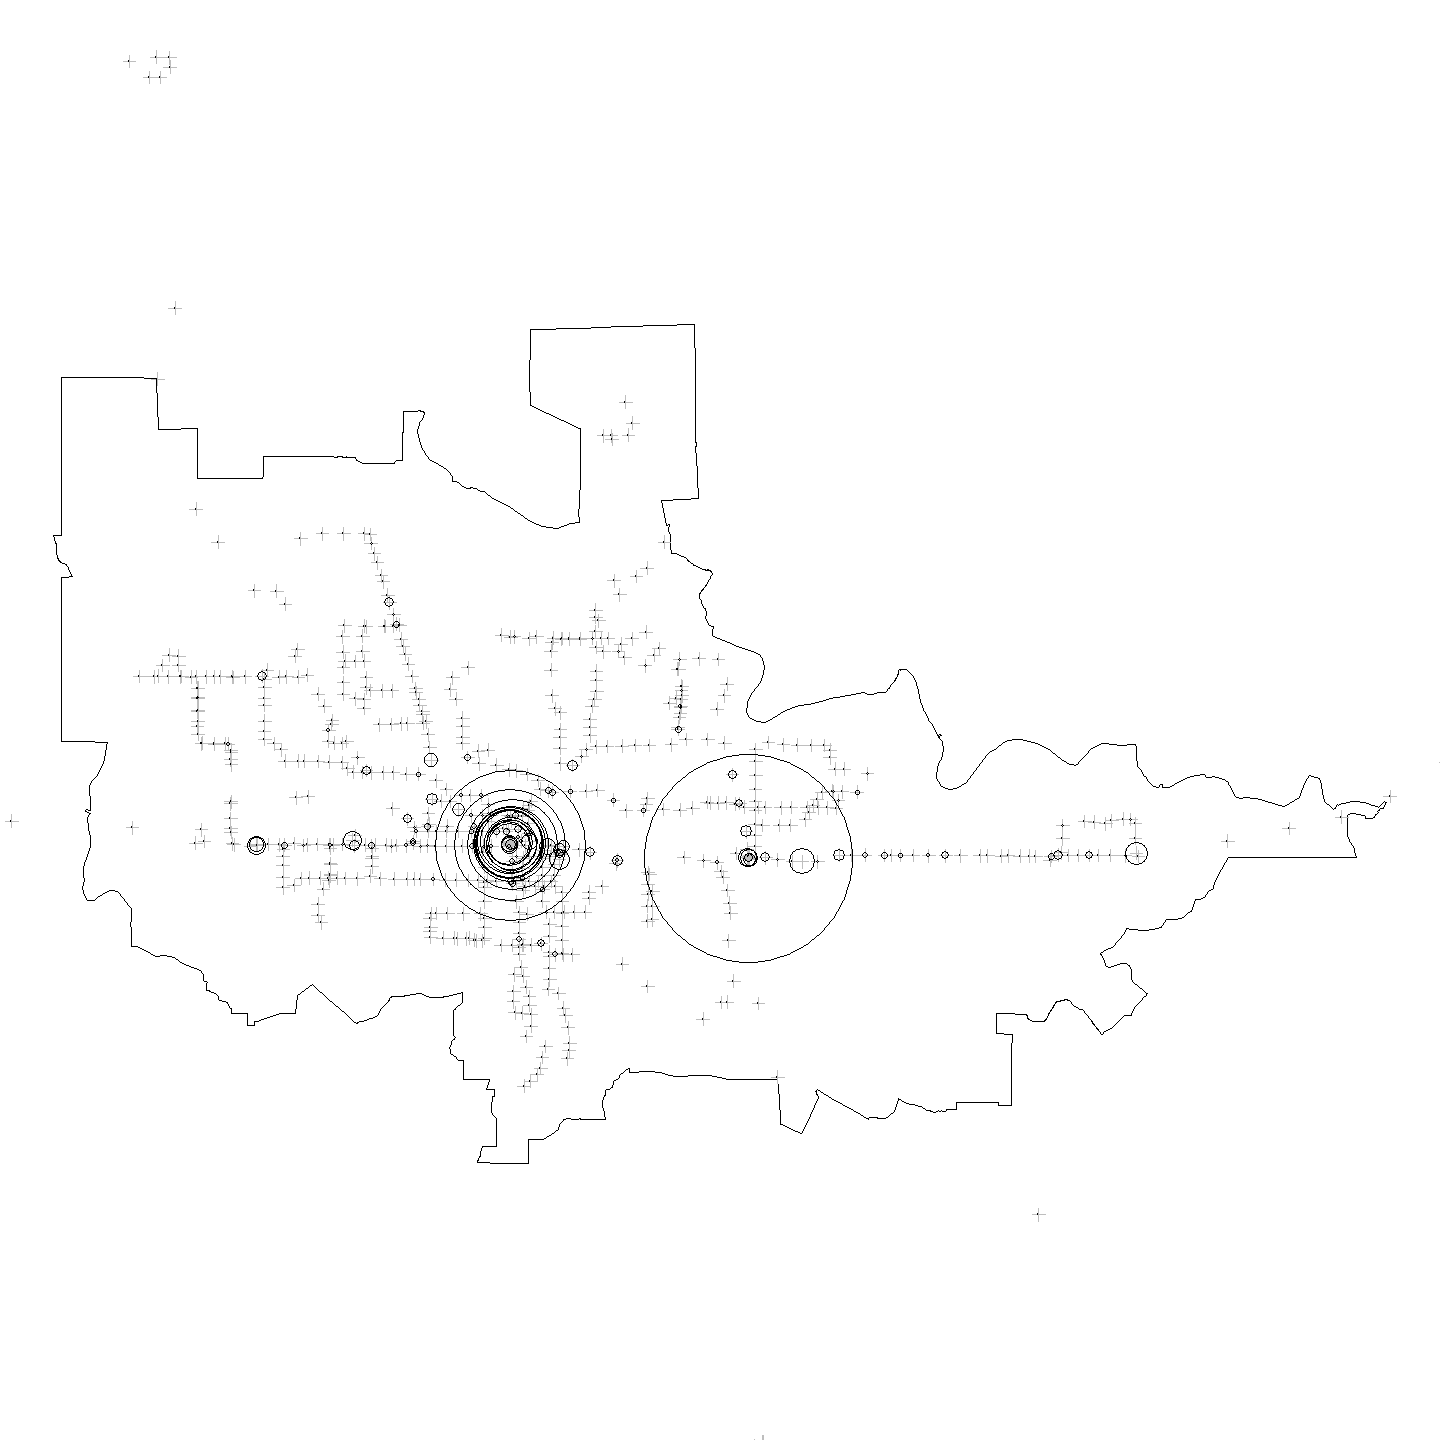

In [130]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/2000)

In [137]:
spdf@data <- spdf@data[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), spdf@data$stop_name),]

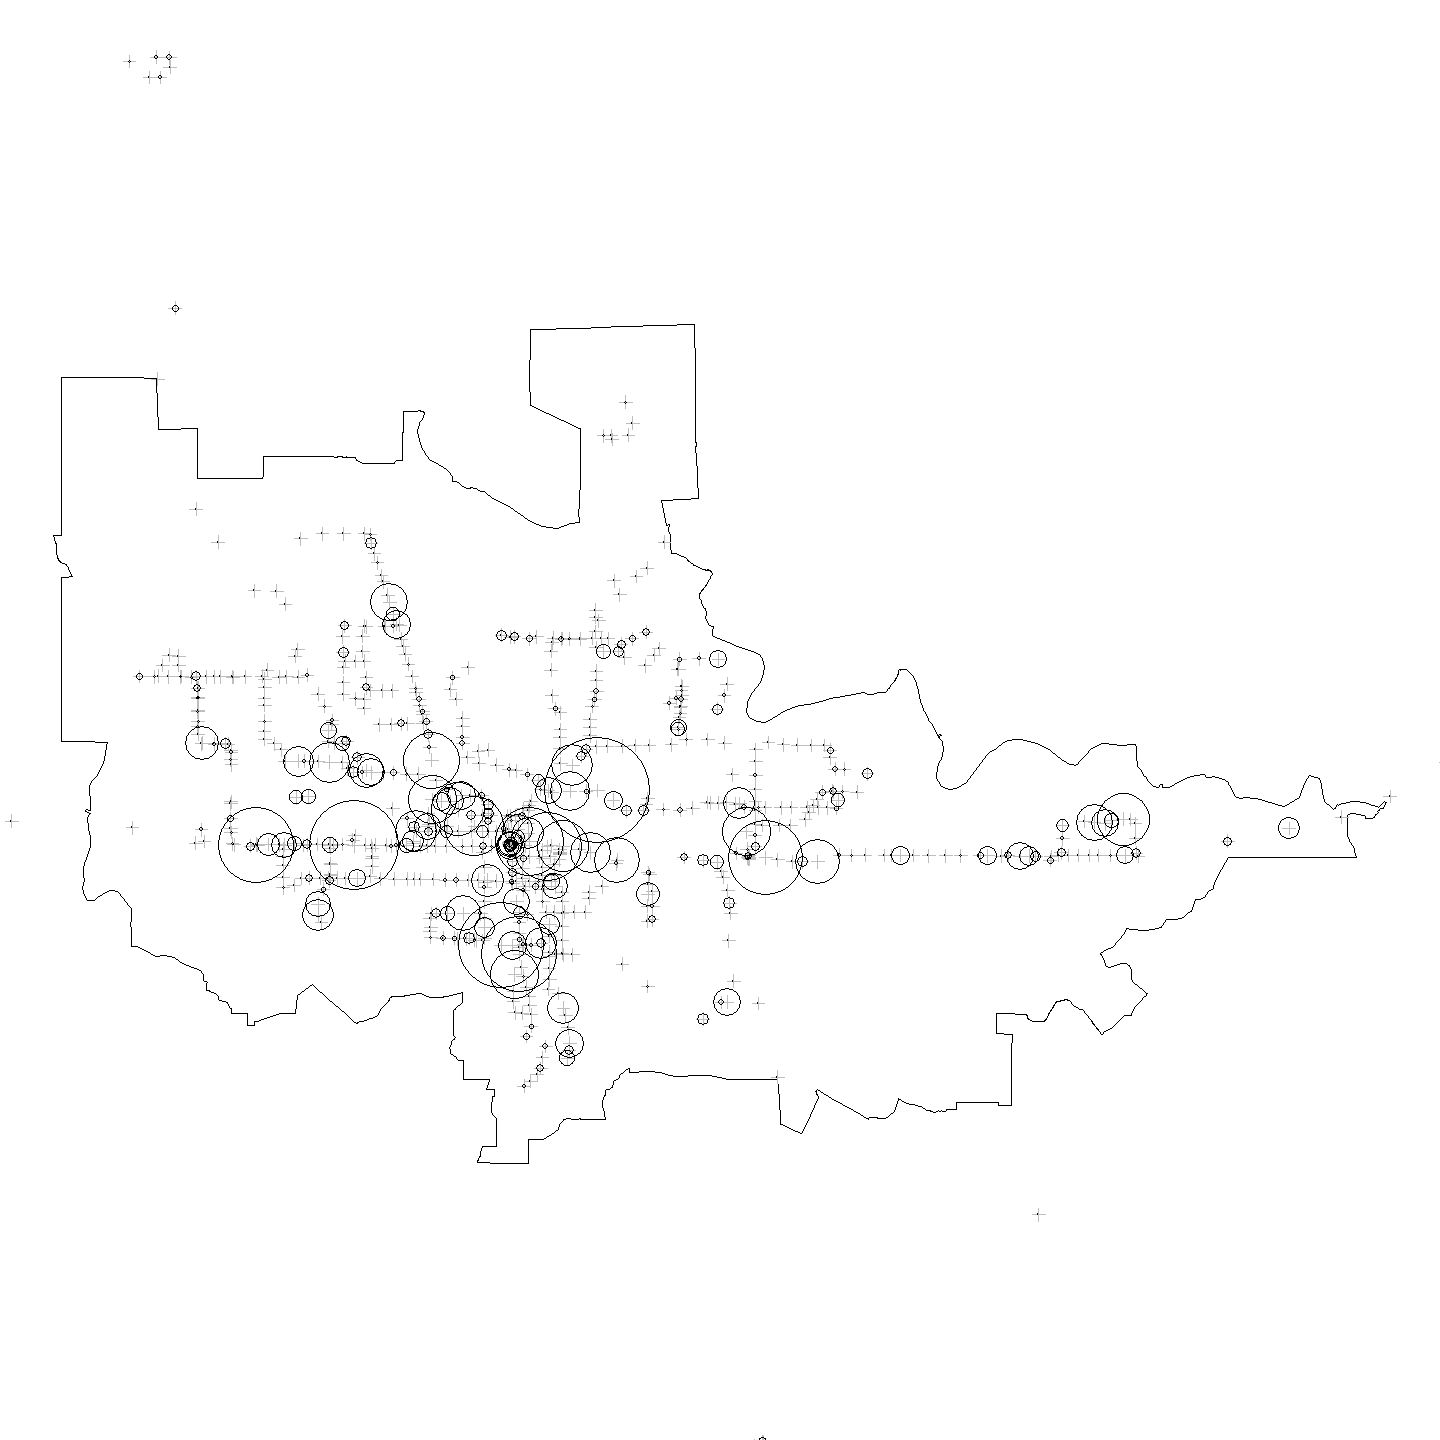

In [140]:
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/500)

In [80]:
outdata <- aggregate(x=list(Counts = data$qty), by=list(Year = year(data$date), Location = data$stop_name), FUN=sum)

In [88]:
names(locdata) <- c('Location', 'Latitude', 'Longitude')

In [89]:
outdata <- merge(outdata, locdata, by = 'Location')

In [90]:
dim(outdata)

[1] 8982    5

In [107]:
outdata <- outdata[rev(order(outdata$Counts)),]

In [119]:
sdata <- outdata[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), outdata$Location),]

In [120]:
head(sdata[rev(order(sdata$Counts)),])

,Location,Year,Counts,Latitude,Longitude,Growth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2387,LCC Station Bay C,2013,2019,44.00978,-123.0351,NA
6925,Seneca Park & Ride,2016,1811,44.04908,-123.1410,0.074139976
2389,LCC Station Bay C,2015,1732,44.00978,-123.0351,0.114543115
6922,Seneca Park & Ride,2013,1704,44.04908,-123.1410,NA
137,Commerce Station Outbound,2019,1694,44.04800,-123.1705,0.461604832
6924,Seneca Park & Ride,2015,1686,44.04908,-123.1410,0.001187648


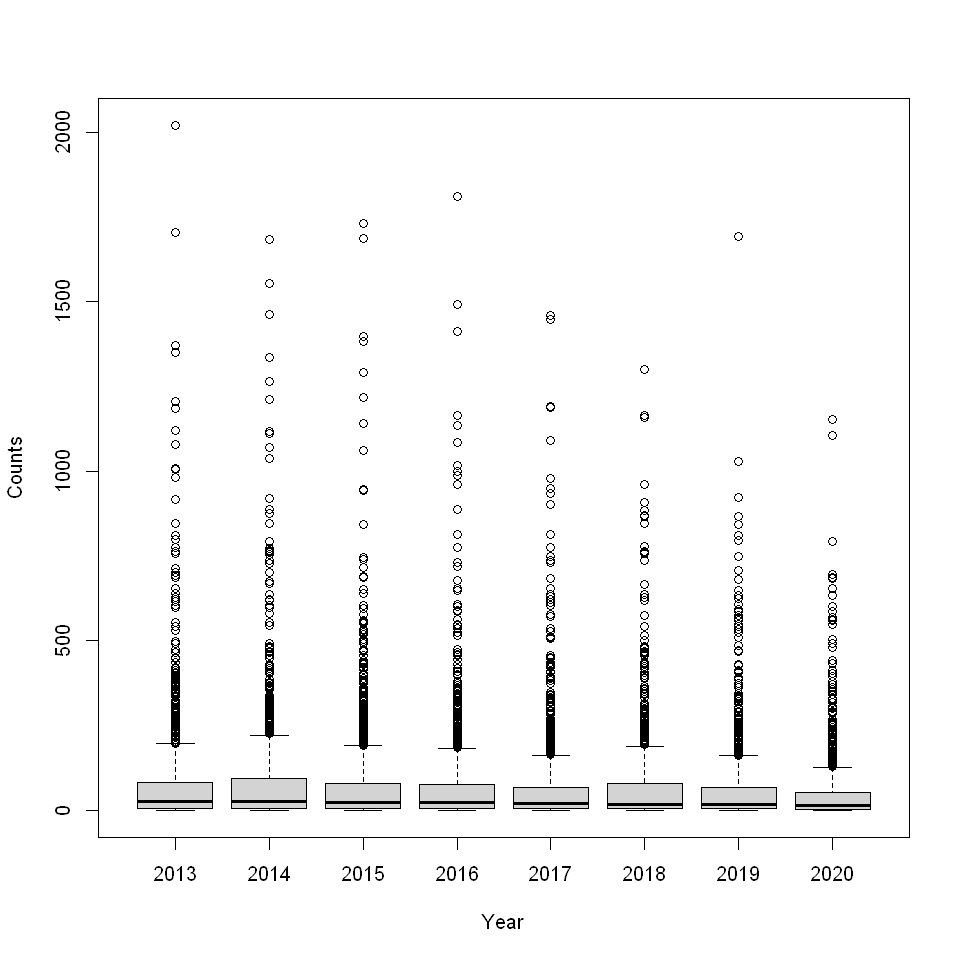

In [121]:
options(repr.plot.width=8, repr.plot.height=8)
boxplot(Counts~Year,data=sdata)

In [92]:
outdata$Growth <- with(outdata[,c('Location', 'Year', 'Counts')], ave(Counts, Location, 
                      FUN=function(x) c(NA, diff(x)/x[-length(x)]) ))

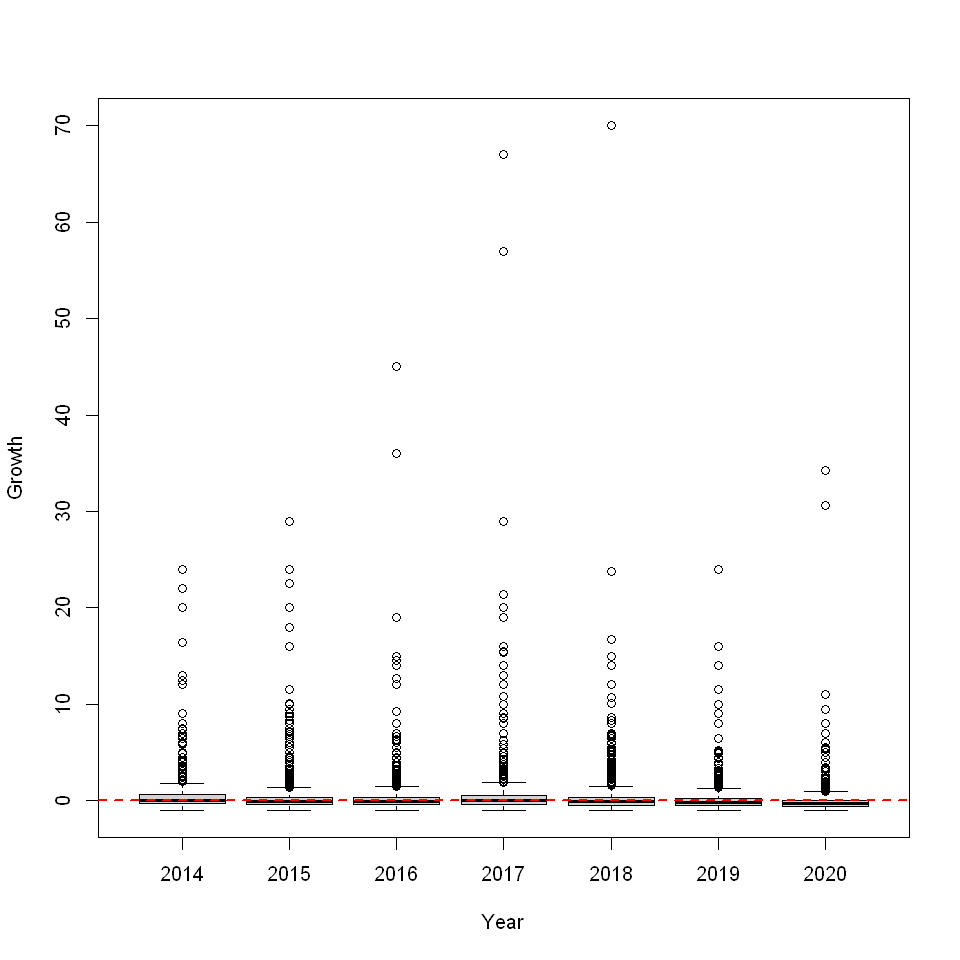

In [122]:
boxplot(Growth~Year,data=sdata)
abline(h=0, col='red', lwd=2, lty=2)